In [1]:
# %matplotlib inline
#custom wrappers for manipulating hdf5 files with pytables
import io_utils 

#standard python libraries
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import os

from math import factorial

bplot = 5

Text(0.5, 0, 'UT on 2017_05_15')

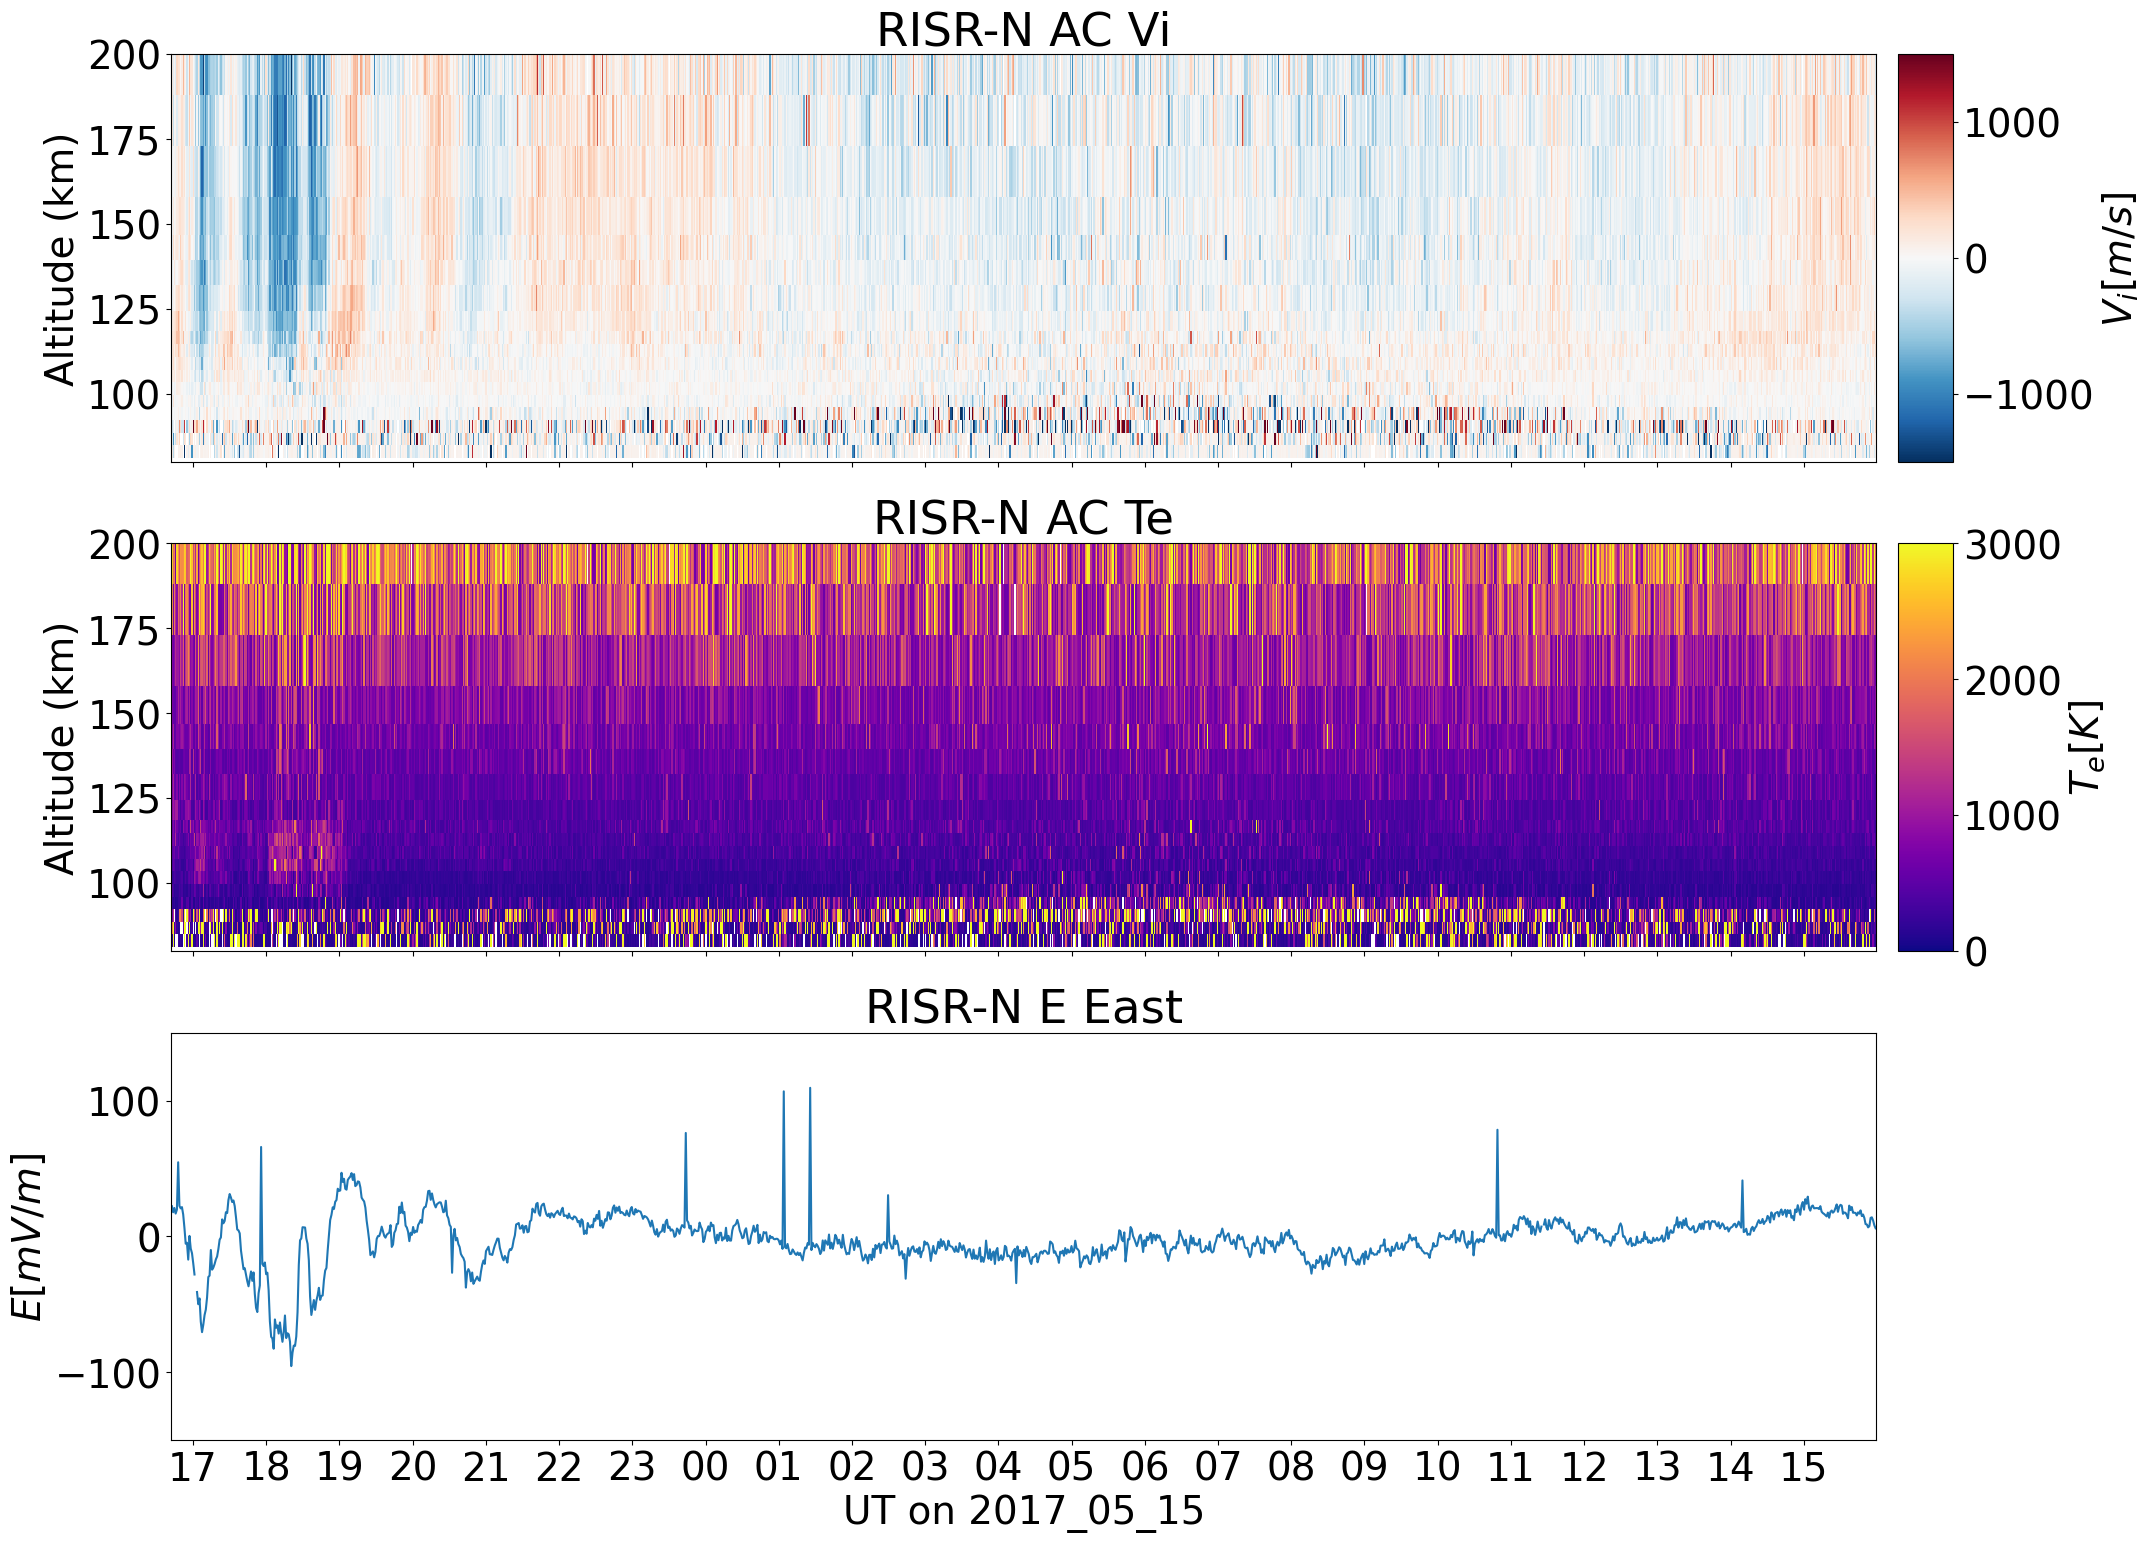

In [2]:
#FB 2017_05_15
datadir = '/Users/alan/Downloads/AOS99/2017_05_15/'
lpfilename=datadir+'20170515.002_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20170515.002_ac_1min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20170515.002_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

plt.rcParams['figure.figsize']=22,18
plt.rcParams['font.size']=28
fig,axarr = plt.subplots(3,1,sharex=True)

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[0].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,0,-1].T,vmin=-1500,vmax=1500,cmap='RdBu_r')
axarr[0].set_title('RISR-N AC Vi')
axarr[0].set_ylabel('Altitude (km)')
axarr[0].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[0].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$V_{i} [m/s]$')

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[1].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T,vmin=0,vmax=3000,cmap='plasma')
axarr[1].set_title('RISR-N AC Te')
axarr[1].set_ylabel('Altitude (km)')
axarr[1].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[1].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$T_e [K]$')

axarr[-1].plot(mdates.date2num(dtv),v['/VectorVels']['Eest'][:,4,1].T*1e3)
axarr[-1].set_title('RISR-N E East')
axarr[-1].set_ylabel(r'$E [mV/m]$')
axarr[-1].set_ylim([-150,150])


# axarr[-1].set_xlim([mdates.date2num(datetime.datetime(2016,8,2,12,0,0)),mdates.date2num(datetime.datetime(2016,8,3,0,0,0))])
axarr[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1].xaxis.set_major_locator(mdates.HourLocator())
axarr[-1].set_xlabel('UT on 2017_05_15')
#plt.savefig('FBExample.png',format='png',dpi=400,bbox_inches='tight')

In [3]:
def magnitude(vector):
    return np.sqrt(sum(pow(element, 2) for element in vector))
h = []
w = []
for i in fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T[5:12].T:
    h.append(magnitude(i))
    # if(dbf['Date_UTC'])
print(flp['/Time']['UnixTime'][:,0])
data = {'DateTime' : flp['/Time']['UnixTime'][:,0], 'Temps': h}
dtf = pd.DataFrame(data)
dtf.head()

[1494866564 1494866625 1494866687 ... 1494950208 1494950270 1494950332]


,DateTime,Temps
0,1494866564,1557.972713
1,1494866625,2044.000321
2,1494866687,1550.720216
3,1494866749,2006.824323
4,1494866811,1692.058583


In [4]:
print(dtf['DateTime'][0])
dt = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[0])
dt2 = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[-1])
print(dt)
strdt = str(dt).replace(" ", "T")[:-2]+"00"
print(strdt)
print(dt2)
strdt2 = str(dt2).replace(" ", "T")[:-2]+"00"
print(strdt2)

1494866564
2017-05-15 09:42:44
2017-05-15T09:42:00
2017-05-16 08:58:52
2017-05-16T08:58:00


In [5]:
TrueSamps = np.array([
    "2011-09-27",
    "2013-06-05",
    "2014-09-11",
    # "2015-03-18",
    "2015-06-08",
    "2015-06-22",
    # "2015-09-10",
    "2015-11-06",
    "2016-06-23",
    "2016-08-02",
    "2017-05-15",
    "2019-05-10"
    # "2019-09-25"
    ])

In [6]:
df = pd.read_csv('/Users/alan/Downloads/AOS99/2009_2022CompleteMag.csv',header = 0)
FBdates = np.zeros(shape=(len(df['Date_UTC']),1))

for j in range(len(df['Date_UTC'])):
    if np.any(TrueSamps == df['Date_UTC'][j][:10]):
        FBdates[j] = 1


In [ ]:
data = {'Date_UTC' : df['Date_UTC'], 'dbn_nez' : df['dbn_nez'], 'dbe_nez' : df['dbe_nez'], 'dbz_nez' : df['dbz_nez'], 'SZA' : df['SZA']}
FBdatesDF = pd.DataFrame(data)
FBdatesDF['Labels'] = FBdates
FBdatesDF.to_csv('Alan.csv')